## Phone Price Classsification

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os


# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.pipeline import Pipeline

# for feature scaling
from sklearn.preprocessing import StandardScaler




# for feature engineering
# from feature_engine import imputation as mdi
# from feature_engine import discretisation as dsc
# from feature_engine import encoding as ce

In [2]:
# loading the dataset 

df = pd.read_csv("C:\\Users\\oigbi\\OneDrive\\Desktop\\NewDataset\PhonePrice.csv")
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [3]:
df.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### PERFORMING EDA

In [4]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [5]:
print(df.shape)

(2000, 21)


In [6]:
# Knowning information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# Getting the statiistical description of the dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Checking for any missing value in the dataset
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
# Checking for any duplicates in the dataset
df.duplicated().any()

False

In [10]:
# let's inspect the variable values

for var in df.columns:
    print(var, df[var].unique()[0:20], '\n')

battery_power [ 842 1021  563  615 1821 1859 1954 1445  509  769 1520 1815  803 1866
  775  838  595 1131  682  772] 

blue [0 1] 

clock_speed [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8] 

dual_sim [0 1] 

fc [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19] 

four_g [0 1] 

int_memory [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8] 

m_dep [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2] 

mobile_wt [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156] 

n_cores [2 3 5 6 1 8 4 7] 

pc [ 2  6  9 14  7 10  0 15  1 18 17 11 16  4 20 13  3 19  8  5] 

px_height [  20  905 1263 1216 1208 1004  381  512  386 1137  248  151  607  344
  356  862  984  441  658  902] 

px_width [ 756 1988 1716 1786 1212 1654 1018 1149  836 1224  874 1005  748 1440
  563 1864 1850  810  878 1064] 

ram [2549 2631 2603 2769 1411 1067 3220  700 1099  513 3946 3826 1482 2680
  373  568 3554 3752 1835 2337] 

sc_h [ 9 17 11 16  

### Visualization on data

In [11]:
# How many Unique value of price_range columns.
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

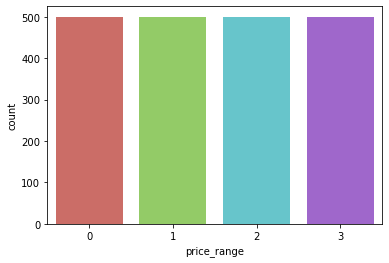

In [12]:
sns.countplot(x = "price_range", data=df, palette="hls")
plt.show()

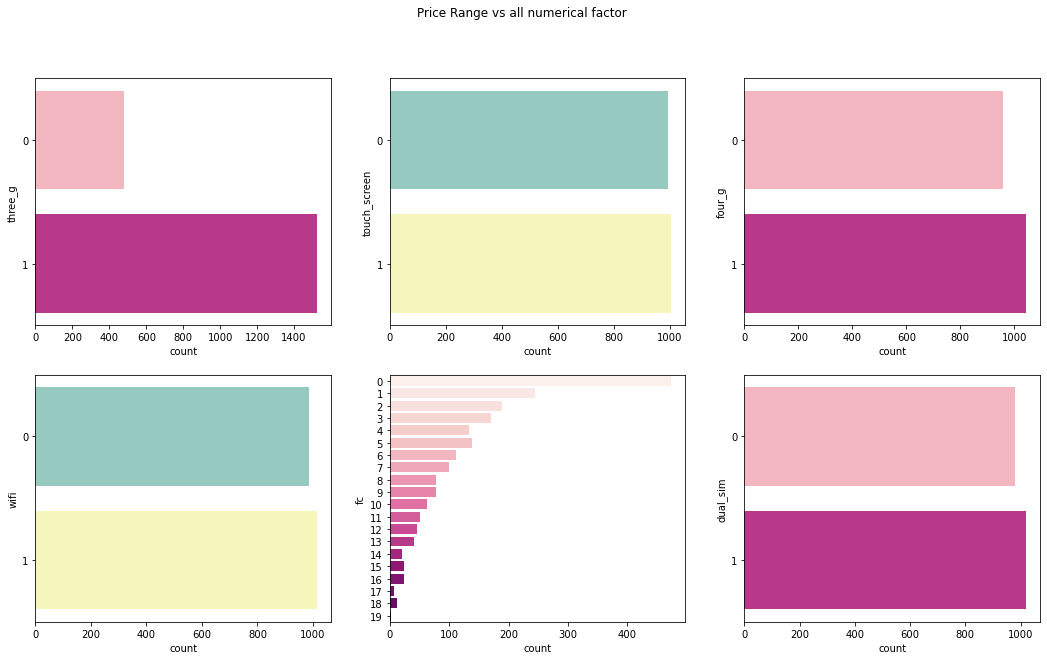

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Range vs all numerical factor')
sns.countplot(ax=axes[0, 0], data=df, y='three_g',palette='RdPu')
sns.countplot(ax=axes[0, 1], data=df, y='touch_screen',palette='Set3')
sns.countplot(ax=axes[0, 2], data=df, y='four_g',palette='RdPu')
sns.countplot(ax=axes[1, 0], data=df, y='wifi',palette='Set3')
sns.countplot(ax=axes[1,1],data = df, y ='fc' ,palette='RdPu')
sns.countplot(ax=axes[1,2],data = df, y ='dual_sim',palette='RdPu' )
plt.show()

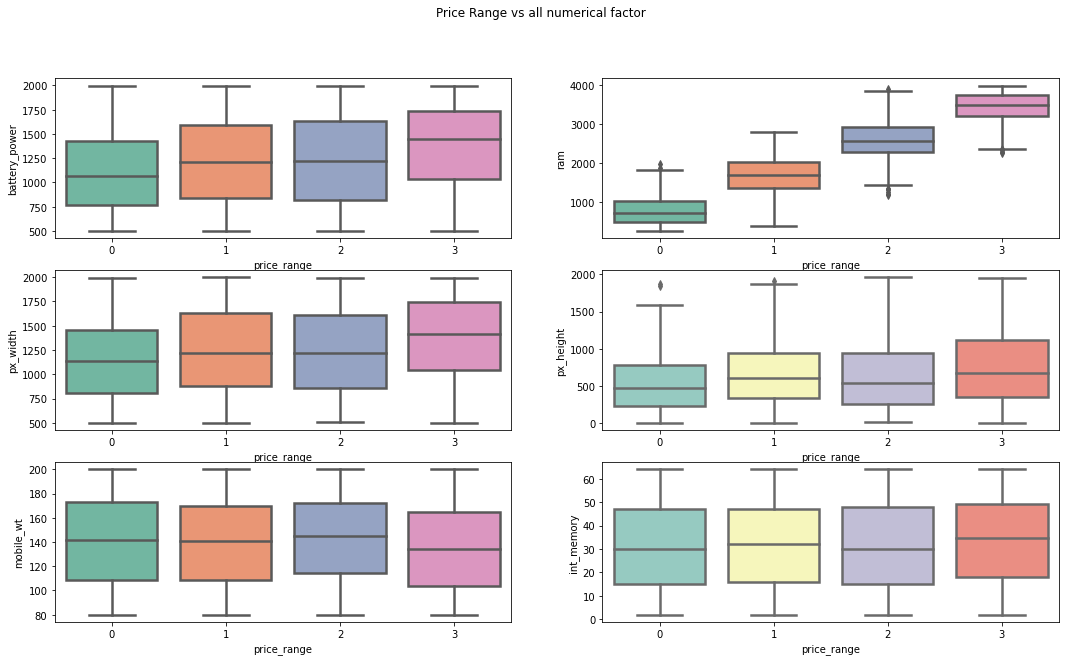

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.boxplot(ax=axes[0, 0], data=df, x='price_range', y='battery_power', linewidth=2.5, palette = "Set2")
sns.boxplot(ax=axes[0, 1], data=df, x='price_range', y='ram', linewidth=2.5, palette = "Set2")
sns.boxplot(ax=axes[1, 0], data=df, x='price_range', y='px_width', linewidth=2.5, palette = "Set2")
sns.boxplot(ax=axes[1, 1], data=df, x='price_range', y='px_height', linewidth=2.5, palette = "Set3")
sns.boxplot(ax=axes[2,0],  data=df,x='price_range',y='mobile_wt', linewidth=2.5, palette = "Set2")
sns.boxplot(ax=axes[2,1],  data=df,x='price_range',y='int_memory', linewidth=2.5, palette = "Set3")
plt.show()

### Feature Selection

In [15]:
# At this point, the dataset will be separated into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['price_range'], axis=1),
    df['price_range'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1400, 20), (600, 20))

### Determine Mutual Information

In [16]:
# calculate the mutual information between the variables and the target
# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([6.08979319e-02, 2.97824204e-02, 0.00000000e+00, 0.00000000e+00,
       4.72424973e-04, 1.45724306e-02, 2.69787898e-02, 1.73285391e-03,
       2.21447851e-04, 1.01201695e-02, 0.00000000e+00, 3.66501966e-02,
       2.93068438e-02, 8.39232541e-01, 8.14135009e-03, 1.58205947e-02,
       0.00000000e+00, 0.00000000e+00, 2.18857915e-03, 0.00000000e+00])

Text(0, 0.5, 'Mutual Information')

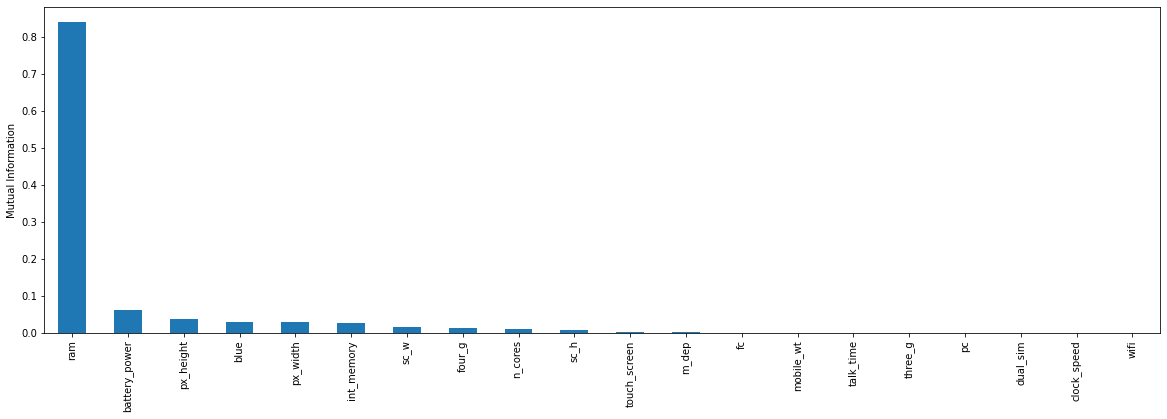

In [17]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [18]:
# Here i will be selecting the top 8 features based on their mutual information values
sel = SelectKBest(mutual_info_classif, k=8).fit(X_train, y_train)
sel

SelectKBest(k=8,
            score_func=<function mutual_info_classif at 0x000001D00C049670>)

In [19]:
X_train.columns[sel.get_support()]

Index(['battery_power', 'dual_sim', 'int_memory', 'px_height', 'px_width',
       'ram', 'touch_screen', 'wifi'],
      dtype='object')

In [20]:
X_train  = sel.transform(X_train)
X_test = sel.transform(X_test)

In [21]:
print(X_train.shape), print(X_test.shape)

(1400, 8)
(600, 8)


(None, None)

### Feature Scaling

In [22]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
sc = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
sc.fit(X_train)

# transform train and test sets
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# the scaler stores the mean of the features, learned from train set
sc.mean_

array([1.23473357e+03, 5.14285714e-01, 3.18200000e+01, 6.59709286e+02,
       1.26475143e+03, 2.10207429e+03, 4.93571429e-01, 5.09285714e-01])

In [24]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

sc.scale_

array([4.41982200e+02, 4.99795877e-01, 1.83667137e+01, 4.44692960e+02,
       4.30737742e+02, 1.07307395e+03, 4.99958672e-01, 4.99913768e-01])

In [25]:
X_train 

array([[-0.90893609,  0.97182532, -0.26243127, ..., -1.412833  ,
        -0.98722446,  0.98159786],
       [ 0.42822183,  0.97182532, -0.64355552, ...,  0.51806841,
        -0.98722446, -1.01874713],
       [-0.84784765,  0.97182532,  0.93538781, ...,  1.64660201,
         1.01294087,  0.98159786],
       ...,
       [-0.10121125,  0.97182532,  0.44537091, ...,  1.40523933,
        -0.98722446,  0.98159786],
       [-0.09894872,  0.97182532, -1.02467977, ..., -1.00093222,
         1.01294087,  0.98159786],
       [-1.19627797, -1.02899151, -0.04464598, ...,  0.29534378,
        -0.98722446,  0.98159786]])

In [26]:
X_test

array([[ 0.49609787,  0.97182532,  0.11869298, ...,  1.22724601,
         1.01294087, -1.01874713],
       [-0.32293964,  0.97182532, -1.13357242, ..., -1.27211577,
         1.01294087, -1.01874713],
       [ 0.65447529,  0.97182532, -1.18801874, ...,  0.53670646,
        -0.98722446,  0.98159786],
       ...,
       [ 1.1001946 ,  0.97182532,  0.06424666, ..., -1.30007283,
         1.01294087,  0.98159786],
       [-1.47683226, -1.02899151,  0.00980034, ...,  0.81534522,
         1.01294087,  0.98159786],
       [-1.51982042,  0.97182532,  0.49981723, ...,  0.46681379,
         1.01294087, -1.01874713]])

### Logistic Regression

In [27]:
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = classifier1.predict(X_test)
print(y_pred)

[3 0 2 2 2 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 2 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 3 2 0 3 3 2 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 2 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 2 0 1 3 0 2 2 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0 0 1 3 0 3 3 0
 2 1 3 2 1 3 2 0 2 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 3 2 2 3 0 0
 1 2 1 2 0 3 3 0 2 3 0 2 2 1 0 2 2 1 3 2 2 0 2 0 3 3 2 1 0 3 1 2 0 0 1 3 0
 3 0 0 1 2 0 1 3 0 2 2 1 

In [29]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.96


### SVM

In [30]:
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [34]:
y_pred2 = classifier2.predict(X_test)
y_pred2

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 2, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
acc2 = accuracy_score(y_test, y_pred2)

[[149   2   0   0]
 [  8 123   4   0]
 [  0   3 142   6]
 [  0   0   6 157]]


In [37]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9516666666666667


### KNN

In [38]:
classifier3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier3.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred3 = classifier3.predict(X_test)
y_pred3

array([3, 0, 2, 2, 1, 0, 0, 2, 3, 1, 0, 2, 0, 1, 2, 0, 3, 2, 1, 1, 1, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 1, 2, 3, 0, 0, 3, 3, 3, 0, 3, 2,
       1, 3, 0, 1, 2, 2, 1, 2, 1, 3, 0, 3, 2, 2, 0, 3, 3, 1, 2, 1, 1, 1,
       3, 2, 1, 2, 3, 2, 1, 0, 0, 3, 2, 1, 2, 1, 3, 3, 3, 0, 1, 0, 2, 0,
       2, 3, 1, 2, 3, 0, 1, 2, 3, 3, 0, 3, 2, 0, 3, 1, 3, 1, 2, 3, 2, 3,
       2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 0, 0, 1, 0, 3,
       2, 3, 3, 3, 3, 1, 0, 2, 1, 1, 2, 3, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       3, 0, 0, 3, 2, 3, 2, 1, 2, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 1, 3, 0, 2, 1, 0, 2, 2, 2, 2, 0, 3, 3, 0, 1, 0, 2, 1, 0, 1, 2,
       1, 0, 3, 3, 2, 1, 1, 3, 3, 3, 1, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 1, 3, 3, 1, 0, 1, 0, 0, 0, 3, 2, 1, 2, 2, 0, 0, 0, 2,
       3, 3, 1, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 1, 0, 0, 0, 2,
       3, 2, 2, 3, 1, 2, 0, 3, 3, 2, 1, 3, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0,
       2, 2, 1, 2, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [43]:
acc3 = accuracy_score(y_test, y_pred3)
print(f"Accurscy score: {acc3}")

Accurscy score: 0.7383333333333333


### Naive Bayes on the Training set

In [45]:
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred4 = classifier4.predict(X_test)
y_pred4

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 2, 3, 1, 1, 3, 0, 2, 0, 3, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 2, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3,
       3, 0, 0, 2, 2, 3, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 3, 1, 1, 2, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 1, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 3, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 3,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 3,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 2, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0,

In [48]:
acc4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.81


### Decision Tree Classification on Train set

In [49]:
classifier5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
y_pred5 = classifier5.predict(X_test)

In [51]:
acc5 = accuracy_score(y_test, y_pred5)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.8683333333333333


### Create visualization for all model with their Accuracy

In [52]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")

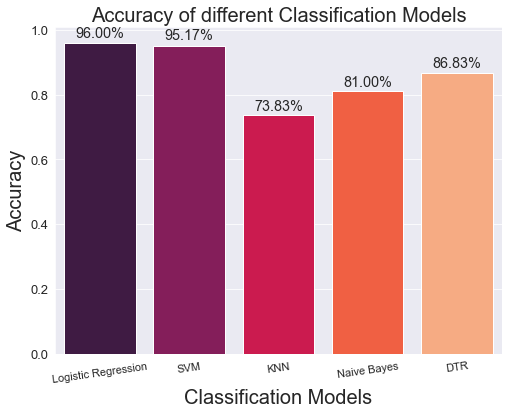

In [53]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()